In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

import tensorflow as tf

import warnings
warnings. filterwarnings("ignore") 

In [2]:
df=pd.read_csv(r"./deliverytime dataset.txt")

In [3]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min)
0,4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24
1,B379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33
2,5D6D,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26
3,7A6A,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21
4,70A2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30


In [4]:
df.tail()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min)
45588,7C09,JAPRES04DEL01,30,4.8,26.902328,75.794257,26.912328,75.804257,Meal,motorcycle,32
45589,D641,AGRRES16DEL01,21,4.6,0.000000,0.000000,0.070000,0.070000,Buffet,motorcycle,36
45590,4F8D,CHENRES08DEL03,30,4.9,13.022394,80.242439,13.052394,80.272439,Drinks,scooter,16
45591,5EEE,COIMBRES11DEL01,20,4.7,11.001753,76.986241,11.041753,77.026241,Snack,motorcycle,26
45592,5FB2,RANCHIRES09DEL02,23,4.9,23.351058,85.325731,23.431058,85.405731,Snack,scooter,36


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  int64  
 3   Delivery_person_Ratings      45593 non-null  float64
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Type_of_order                45593 non-null  object 
 9   Type_of_vehicle              45593 non-null  object 
 10  Time_taken(min)              45593 non-null  int64  
dtypes: float64(5), int64(2), object(4)
memory usage: 3.8+ MB


In [6]:
df.isnull().sum()

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Type_of_order                  0
Type_of_vehicle                0
Time_taken(min)                0
dtype: int64

In [7]:
df.describe()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_taken(min)
count,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000
mean,29.544075,4.632367,17.017729,70.231332,17.465186,70.845702,26.294607
std,5.696793,0.327708,8.185109,22.883647,7.335122,21.118812,9.383806
min,15.000000,1.000000,-30.905562,-88.366217,0.010000,0.010000,10.000000
25%,25.000000,4.600000,12.933284,73.170000,12.988453,73.280000,19.000000
50%,29.000000,4.700000,18.546947,75.898497,18.633934,76.002574,26.000000
75%,34.000000,4.800000,22.728163,78.044095,22.785049,78.107044,32.000000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,54.000000


In [9]:
df=df.drop(columns=["ID","Delivery_person_ID"])
df

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min)
0,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24
1,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33
2,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26
3,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21
4,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30
...,...,...,...,...,...,...,...,...,...
45588,30,4.8,26.902328,75.794257,26.912328,75.804257,Meal,motorcycle,32
45589,21,4.6,0.000000,0.000000,0.070000,0.070000,Buffet,motorcycle,36
45590,30,4.9,13.022394,80.242439,13.052394,80.272439,Drinks,scooter,16
45591,20,4.7,11.001753,76.986241,11.041753,77.026241,Snack,motorcycle,26


In [10]:
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min)
0,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24
1,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33
2,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26
3,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21
4,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30


In [11]:
df[df["Delivery_person_Ratings"]>5.0].shape #we can see some person gave rating above the 5.0

(53, 9)

In [12]:
df["Delivery_person_Ratings"]=df["Delivery_person_Ratings"].apply(lambda x:5.0 if x>5.0 else x)  # we convert the person rating to 5.0

In [13]:
# we can calculate the distance by  using the Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude
import math

def calculate_distance(lat1, lon1, lat2, lon2):
    R = 6371  

    lat1_rad = math.radians(lat1)
    lon1_rad = math.radians(lon1)
    lat2_rad = math.radians(lat2)
    lon2_rad = math.radians(lon2)

    delta_lat = lat2_rad - lat1_rad
    delta_lon = lon2_rad - lon1_rad

    a = math.sin(delta_lat / 2) ** 2 + math.cos(lat1_rad) * math.cos(lat2_rad) * math.sin(delta_lon / 2) ** 2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    distance = R * c

    return distance


In [14]:
dist_col=["Restaurant_latitude","Restaurant_longitude","Delivery_location_latitude","Delivery_location_longitude"]

In [15]:
df['Distance'] = df[dist_col].apply(
    lambda x:calculate_distance(x[0], x[1], x[2], x[3]), 
    axis=1)

In [16]:
d=['Delivery_person_Age','Delivery_person_Ratings','Time_taken(min)']

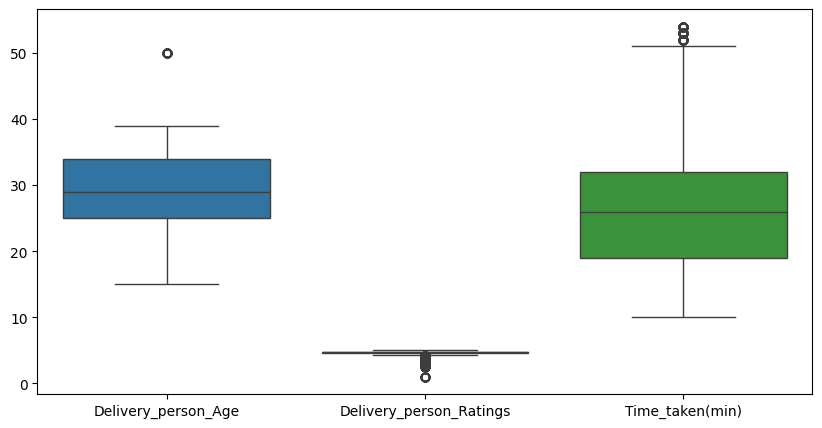

In [17]:
plt.figure(figsize=(10,5))
sns.boxplot(df[d])
plt.xticks()
plt.show()

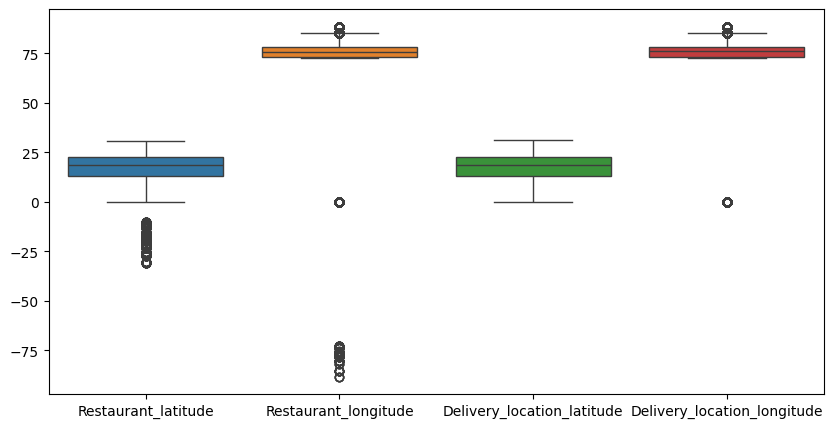

In [18]:
plt.figure(figsize=(10,5))
sns.boxplot(df[dist_col])
plt.xticks()
plt.show()

In [19]:
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min),Distance
0,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24,3.025149
1,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33,20.183530
2,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26,1.552758
3,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21,7.790401
4,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30,6.210138


In [20]:
Type_of_order=pd.get_dummies(df["Type_of_order"], dtype= 'int')
Type_of_order.head()

,Buffet,Drinks,Meal,Snack
0,0,0,0,1
1,0,0,0,1
2,0,1,0,0
3,1,0,0,0
4,0,0,0,1


In [21]:
Type_of_vehicle=pd.get_dummies(df["Type_of_vehicle"], dtype= 'int')
Type_of_vehicle.head()

,bicycle,electric_scooter,motorcycle,scooter
0,0,0,1,0
1,0,0,0,1
2,0,0,1,0
3,0,0,1,0
4,0,0,0,1


In [22]:
df=pd.concat([df,Type_of_order,Type_of_vehicle],axis=1)

In [23]:
df=df.drop(columns=["Type_of_order","Type_of_vehicle"])

In [24]:
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_taken(min),Distance,Buffet,Drinks,Meal,Snack,bicycle,electric_scooter,motorcycle,scooter
0,37,4.9,22.745049,75.892471,22.765049,75.912471,24,3.025149,0,0,0,1,0,0,1,0
1,34,4.5,12.913041,77.683237,13.043041,77.813237,33,20.183530,0,0,0,1,0,0,0,1
2,23,4.4,12.914264,77.678400,12.924264,77.688400,26,1.552758,0,1,0,0,0,0,1,0
3,38,4.7,11.003669,76.976494,11.053669,77.026494,21,7.790401,1,0,0,0,0,0,1,0
4,32,4.6,12.972793,80.249982,13.012793,80.289982,30,6.210138,0,0,0,1,0,0,0,1


In [25]:
cols=['Delivery_person_Age','Delivery_person_Ratings','Restaurant_latitude','Restaurant_longitude','Delivery_location_latitude','Delivery_location_longitude','Distance']

In [26]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
df[cols]=std.fit_transform(df[cols])

In [27]:
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_taken(min),Distance,Buffet,Drinks,Meal,Snack,bicycle,electric_scooter,motorcycle,scooter
0,1.308808,0.828058,0.699732,0.247391,0.722540,0.239920,24,-0.087548,0,0,0,1,0,0,1,0
1,0.782190,-0.404191,-0.501488,0.325647,-0.602879,0.329924,33,-0.071946,0,0,0,1,0,0,0,1
2,-1.148742,-0.712254,-0.501338,0.325435,-0.619072,0.324013,26,-0.088887,0,1,0,0,0,0,1,0
3,1.484347,0.211934,-0.734764,0.294762,-0.874094,0.292671,21,-0.083215,1,0,0,0,0,0,1,0
4,0.431111,-0.096129,-0.494188,0.437813,-0.607003,0.447202,30,-0.084652,0,0,0,1,0,0,0,1


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Delivery_person_Age          45593 non-null  float64
 1   Delivery_person_Ratings      45593 non-null  float64
 2   Restaurant_latitude          45593 non-null  float64
 3   Restaurant_longitude         45593 non-null  float64
 4   Delivery_location_latitude   45593 non-null  float64
 5   Delivery_location_longitude  45593 non-null  float64
 6   Time_taken(min)              45593 non-null  int64  
 7   Distance                     45593 non-null  float64
 8   Buffet                       45593 non-null  int32  
 9   Drinks                       45593 non-null  int32  
 10  Meal                         45593 non-null  int32  
 11  Snack                        45593 non-null  int32  
 12  bicycle                      45593 non-null  int32  
 13  electric_scooter

In [29]:
X=df.drop(columns=["Time_taken(min)"])
y=df.loc[:,"Time_taken(min)"]

In [30]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [31]:
X_train.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Distance,Buffet,Drinks,Meal,Snack,bicycle,electric_scooter,motorcycle,scooter
21862,0.080033,-2.560628,-5.397490,0.339997,1.340912,0.345947,5.416451,0,0,0,1,0,0,1,0
24165,1.484347,-0.096129,0.049908,0.357297,0.001505,0.360431,-0.083312,0,0,0,1,0,1,0,0
31141,0.782190,-1.944504,0.776695,0.660049,0.811148,0.688009,-0.084810,0,0,0,1,0,0,0,1
2743,0.080033,0.519996,-0.732148,0.296462,-0.875265,0.293092,-0.087466,0,0,0,1,0,0,0,1
14292,1.484347,-1.020316,-0.574313,0.278444,-0.690960,0.276409,-0.078992,1,0,0,0,0,0,0,1


In [32]:
y_train.head()

21862    31
24165    22
31141    31
2743     24
14292    33
Name: Time_taken(min), dtype: int64

In [33]:
metric_r2 = {}
metric_mse = {}
metric_tt = {}

In [34]:
from sklearn.ensemble import RandomForestRegressor
rndf=RandomForestRegressor()
start = pd.Timestamp.now()
rndf.fit(X_train,y_train)
timeTaken_rf = pd.Timestamp.now() - start
print(f"Time taken for Random Forest {timeTaken_rf.total_seconds()}s")
metric_tt["Random Forest"] = timeTaken_rf

Time taken for Random Forest 96.827153s


In [35]:
y_pred_rf =rndf.predict(X_train)

In [36]:
y_pred_rf[:5]

array([32.65, 22.94, 31.62, 24.16, 35.05])

In [37]:
y_train[:5]

21862    31
24165    22
31141    31
2743     24
14292    33
Name: Time_taken(min), dtype: int64

In [38]:
mse=mean_squared_error(y_true = y_train, y_pred = y_pred_rf)
print(f"Mean Squared Error for Random Forest {mse}")
metric_mse["Random Forest"] = mse

Mean Squared Error for Random Forest 8.780340209767552


In [39]:
r2=r2_score(y_true = y_train, y_pred = y_pred_rf)
print(f"R2 score for Random Forest {r2}")
metric_r2["Random Forest"] = r2

R2 score for Random Forest 0.9004514751205791


In [40]:
from sklearn.tree import DecisionTreeRegressor
tree=DecisionTreeRegressor()
start = pd.Timestamp.now()
tree.fit(X_train,y_train)
timeTaken_dt = pd.Timestamp.now() - start
print(f"Time taken for Decision Tree {timeTaken_dt.total_seconds()}s")
metric_tt["Decision Tree"] = timeTaken_dt

Time taken for Decision Tree 1.096273s


In [41]:
y_pred_dt =tree.predict(X_train)

In [42]:
y_pred_dt[:5]

array([31., 22., 31., 24., 33.])

In [43]:
y_train[:5]

21862    31
24165    22
31141    31
2743     24
14292    33
Name: Time_taken(min), dtype: int64

In [44]:
mse=mean_squared_error(y_true = y_train, y_pred = y_pred_dt)
print(f"Mean Squared Error for Decision Tree {mse}")
metric_mse["Decision Tree"] = mse

Mean Squared Error for Decision Tree 0.7846182668933122


In [45]:
r2=r2_score(y_true = y_train, y_pred = y_pred_dt)
print(f"R2 score for Decision Tree {r2}")
metric_r2["Decision Tree"] = r2

R2 score for Decision Tree 0.9911042637077107


In [46]:
from xgboost import XGBRegressor
xgb=XGBRegressor()
start = pd.Timestamp.now()
xgb.fit(X_train,y_train)
timeTaken_xgb = pd.Timestamp.now() - start
print(f"Time taken for XG Boost {timeTaken_xgb.total_seconds()}s")
metric_tt["XG Boost"] = timeTaken_xgb

Time taken for XG Boost 0.96727s


In [47]:
y_pred_xgb =xgb.predict(X_train)

In [48]:
y_pred_xgb[:5]

array([33.82722 , 23.801882, 32.96875 , 21.885853, 39.169712],
      dtype=float32)

In [49]:
y_train[:5]

21862    31
24165    22
31141    31
2743     24
14292    33
Name: Time_taken(min), dtype: int64

In [50]:
mse=mean_squared_error(y_true = y_train, y_pred = y_pred_xgb)
print(f"Mean Squared Error for XG Boost {mse}")
metric_mse["XG Boost"] = mse

Mean Squared Error for XG Boost 41.94507598876953


In [51]:
r2=r2_score(y_true = y_train, y_pred = y_pred_xgb)
print(f"R2 score for XG Boost {r2}")
metric_r2["XG Boost"] = r2

R2 score for XG Boost 0.5244408845901489


In [52]:
model_cnn=tf.keras.models.Sequential([tf.keras.layers.Dense(units=6 ,activation="relu"),
                                  tf.keras.layers.Dense(units=6,activation="relu"),
                                  tf.keras.layers.Dense(units=4,activation="relu"),
                                  tf.keras.layers.Dense(units=5,activation="relu"),
                                  tf.keras.layers.Dense(units=1)])

In [53]:
model_cnn.compile(optimizer="rmsprop",loss="mse",metrics=[tf.keras.metrics.MeanSquaredError])

In [54]:
start = pd.Timestamp.now()
model_cnn.fit(X_train,y_train,batch_size=32,epochs=100)
timeTaken_cnn = pd.Timestamp.now() - start
print(f"Time taken for Convolutional Neural Network {timeTaken_cnn.total_seconds()}s")
metric_tt["Convolutional Neural Network"] = timeTaken_xgb

Epoch 1/100
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - loss: 525.9973 - mean_squared_error: 525.9973
Epoch 2/100
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 72.0235 - mean_squared_error: 72.0235
Epoch 3/100
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 71.3606 - mean_squared_error: 71.3606
Epoch 4/100
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 69.2339 - mean_squared_error: 69.2339
Epoch 5/100
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 70.0902 - mean_squared_error: 70.0902
Epoch 6/100
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - loss: 68.6845 - mean_squared_error: 68.6845 
Epoch 7/100
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - loss: 69.9451 - mean_squared_error: 69.9451 
Epoch 8/100
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 69.1524 - mean_squared_error: 69.1524
Epoch 9/100
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 69.5438 - mean_squared_error: 69.5438
Epoch 10/100
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 69.8246 - mean_sq

In [55]:
y_pred_cnn =model_cnn.predict(X_train)


1140/1140 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step


In [56]:
y_pred_cnn[:5]

array([[34.277027],
       [23.870691],
       [35.617012],
       [24.36995 ],
       [35.18251 ]], dtype=float32)

In [57]:
y_train[:5]

21862    31
24165    22
31141    31
2743     24
14292    33
Name: Time_taken(min), dtype: int64

In [58]:
mse=mean_squared_error(y_true = y_train, y_pred = y_pred_cnn)
print(f"Mean Squared Error for Convolutional Neural Network {mse}")
metric_mse["Convolutional Neural Network"] = mse

Mean Squared Error for Convolutional Neural Network 63.121971130371094


In [59]:
r2=r2_score(y_true = y_train, y_pred = y_pred_cnn)
print(f"R2 score for Convolutional Neural Network {r2}")
metric_r2["Convolutional Neural Network"] = r2

R2 score for Convolutional Neural Network 0.2843444347381592


In [60]:
metrices = pd.DataFrame(data=metric_mse.keys(), columns=['Algorithms'])

In [61]:
metrices['R2'] = metrices.Algorithms.map(metric_r2)
metrices['Mean Squared Error'] = metrices.Algorithms.map(metric_mse)


In [62]:
metrices

,Algorithms,R2,Mean Squared Error
0,Random Forest,0.900451,8.780340
1,Decision Tree,0.991104,0.784618
2,XG Boost,0.524441,41.945076
3,Convolutional Neural Network,0.284344,63.121971


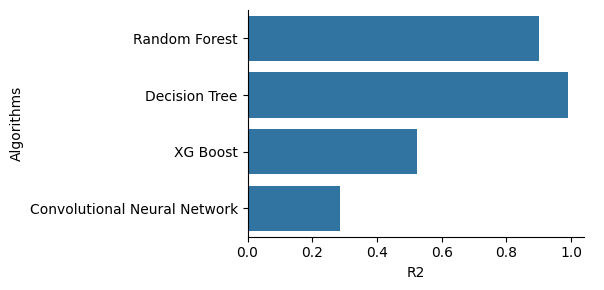

In [63]:
sns.catplot(data = metrices, x= 'R2', y='Algorithms', kind="bar", height=3, aspect=2)
plt.show()

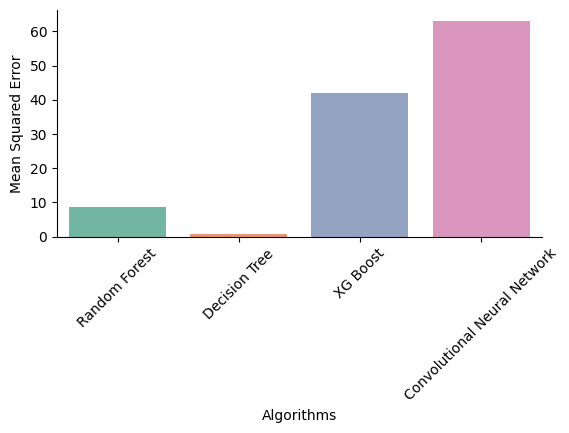

In [64]:
sns.catplot(data = metrices, y= 'Mean Squared Error', x='Algorithms', kind="bar", height=3, aspect=2, palette="Set2")
plt.xticks(rotation = 45)
plt.show()

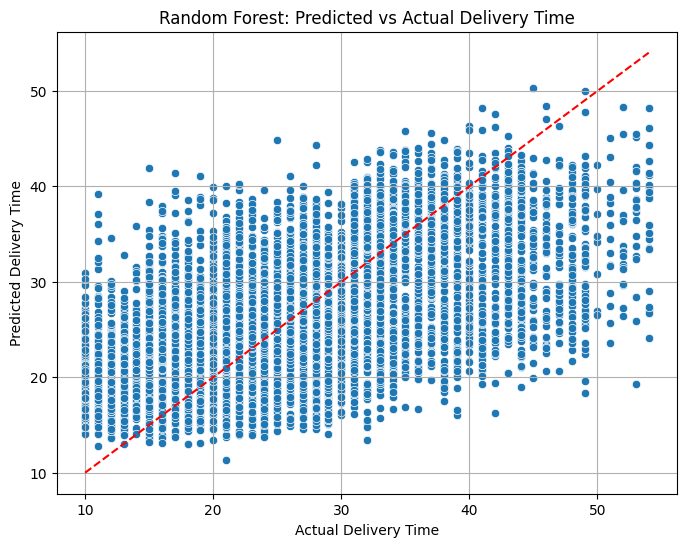

In [67]:
y_pred = rndf.predict(X_test)

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Delivery Time')
plt.ylabel('Predicted Delivery Time')
plt.title('Random Forest: Predicted vs Actual Delivery Time')
plt.grid(True)
plt.show()
